<a href="https://colab.research.google.com/github/BrianGisemba/KNN-Naive-Bayes-Classifiers/blob/main/Moringa_School_Week_9_IP_Brian_Michira_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Defining the Question

##Specifying the Question

Predict the Passengers who survived in the Titanic disaster using the K Nearest Neighbours Classifier.

##Defining the Metrics for Succes

Creating a model that has an accuracy score of above 80%.

##Understanding the Context

The RMS titanic sank on 15th April 1912.The titnic had an estimated 2,224 people on boardwhen she struck an iceberg.Her sinking resultedin deaths ofof more than 1500 people making it one of the deadliest maritime disasters in history.Almost all of those who jumped or fell into the water drowned or died within minutes due to the effects of cold shock. The RMS Carpathia arrived about an hour and a half after the sinking and rescued all of the survivors.


##Recording the Experimental Design

1. Defining the Question.
2. Loading and Previewing the Dataset.
3. Data Cleaning.
4. Modelling.
5. Challenging the Solution.
6. Conclusion.

#Importing Libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#Loading and Previewing the Dataset

In [ ]:
#loading the dataset
titanic=pd.read_csv("/content/train (5).csv")

In [ ]:
#viewing th top of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#viewing the bottom of the dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#checking the number of records
titanic.shape

(891, 12)

In [ ]:
#checking the info of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning the Dataset

## Validity

In [ ]:
#checking for irrelevant columns 
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#list of irrelevant columns
col=['PassengerId', 'Name','Fare','Ticket','Cabin']

In [ ]:
#dropping the columns
titanic.drop(col,inplace=True,axis=1)

In [ ]:
#viewing the new dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Uniformity

In [ ]:
#We shall rename our column names to be in pascal naming convection
titanic.columns = titanic.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
#confirm if the code above has been implemented
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

##Consistency

In [ ]:
#Checking for duplicates
titanic.duplicated().sum()

306

In [ ]:
#viewing the duplicates
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,embarked
32,1,3,female,NaN,0,0,Q
42,0,3,male,NaN,0,0,C
45,0,3,male,NaN,0,0,S
47,1,3,female,NaN,0,0,Q
51,0,3,male,21.0,0,0,S
...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,S
882,0,3,female,22.0,0,0,S
883,0,2,male,28.0,0,0,S
884,0,3,male,25.0,0,0,S


Dropping the duplicates would affect the analysis hence we decided not to drop them.

##Completness

In [ ]:
#We shall check for any null values in our data
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

In [ ]:
#dealing with null values by inputing the mean
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

In [ ]:
#dealing with null values in embarked by imputing the mode value
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked'].fillna('S', inplace = True)

In [ ]:
#checking for null  values
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

##Outliers

In [ ]:
#checking the columns
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

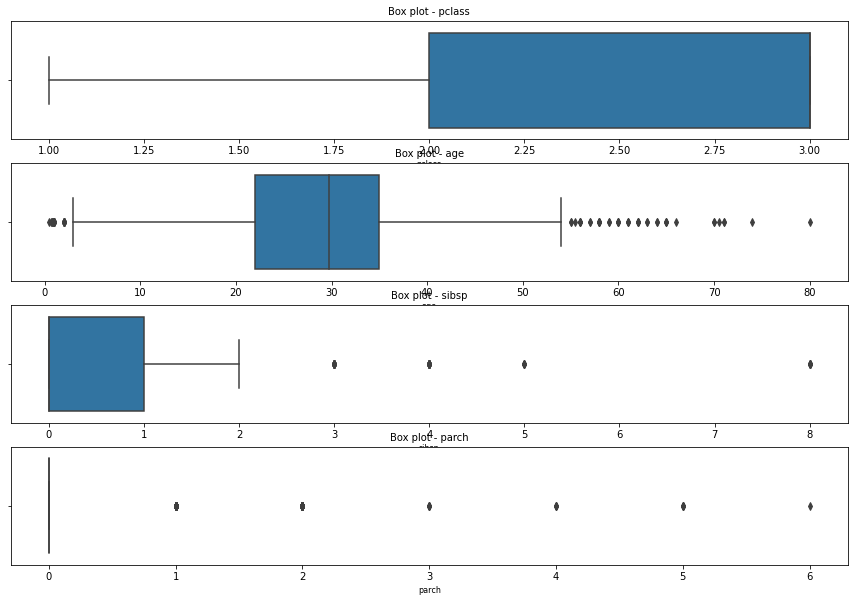

In [ ]:
#checking for outliers
col_names=['pclass', 'age', 'sibsp', 'parch']

fig, ax = plt.subplots(len(col_names), figsize=(15,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(titanic[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
# dealing with outliers
# quantiles
Q1 = titanic.quantile(0.25)
Q3 = titanic.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
titanic1 = titanic[~((titanic < (Q1 - 1.5 * IQR)) | (titanic > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(titanic1.shape)

# Printing the shape of our old dataset
print(titanic.shape)

(642, 7)
(891, 7)


We decided not to drop the outliers since ti would affect our ananlysis.

#Explanatory Analysis

## Univariate Analysis

In [ ]:
#checking the statistical summaries of the data
titanic.describe()

,survived,pclass,age,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [ ]:
numerical_columns=['age','sibsp','parch']

In [ ]:
#Measure of Central Tendancies
#mean
col_names = numerical_columns
for i, col_val in enumerate(col_names):
  print('The mean of ' + str(col_val) + ' is ' + str(titanic[col_val].mean()))

The mean of age is 29.699117647058763
The mean of sibsp is 0.5230078563411896
The mean of parch is 0.38159371492704824


The mean Age is 29 years.

In [ ]:
#mode
col_names = numerical_columns
for i, col_val in enumerate(col_names):
  print('The mode of ' + str(col_val) + ' is ' + str(titanic[col_val].mode()))

The mode of age is 0    29.699118
dtype: float64
The mode of sibsp is 0    0
dtype: int64
The mode of parch is 0    0
dtype: int64


Most of the passengers were 29 years

In [ ]:
#skewness
for i, col_val in enumerate(col_names):
  print('The skewness of ' + str(col_val) + ' is ' + str(titanic[col_val].skew()))

The skewness of age is 0.4344880940129925
The skewness of sibsp is 3.6953517271630565
The skewness of parch is 2.7491170471010933


 Number of siblings or spouses were positively skewed showing that most values appeared on the right side/were greater than the mean.

 Numbver of parents or children were positively skewed showing that most of the values appeared on the right side/are greater than the mean.

In [ ]:
#kurtosis
for i, col_val in enumerate(col_names):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(titanic[col_val].kurt()))

The kurtosis of age is 0.9662793026645233
The kurtosis of sibsp is 17.880419726645968
The kurtosis of parch is 9.778125179021648


Number of siblings and spouses has a high kurtosis-Leptokurtic indicating presence of outliers.

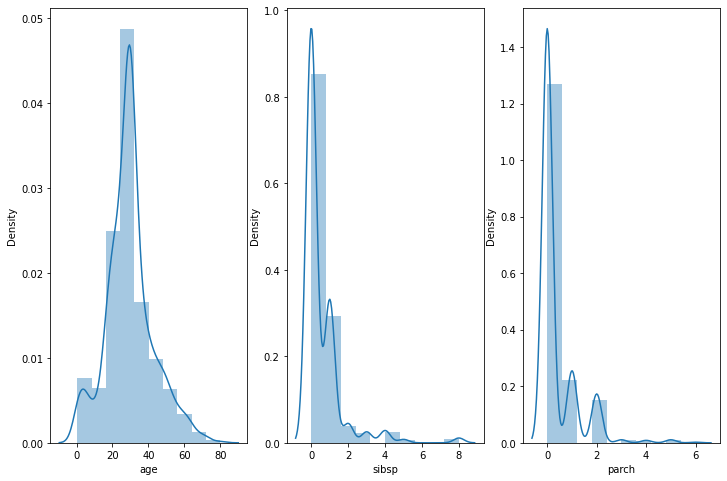

In [ ]:
# graphical representation of the univariate analysis

bins = 10

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize= (12,8))

sns.distplot(titanic.age, ax=ax1, bins= bins)
sns.distplot(titanic.sibsp, ax=ax2, bins= bins)
sns.distplot(titanic.parch, ax=ax3, bins= bins)

plt.show()

Age is normally distributed.

Number of siblings and spouse are positively skewed/skewed to the right indicated that most values appear on the right side -are greater than the mean.

Number of parents and children are positively skewed/skewed to the right indicating that most values appear on the righ side.

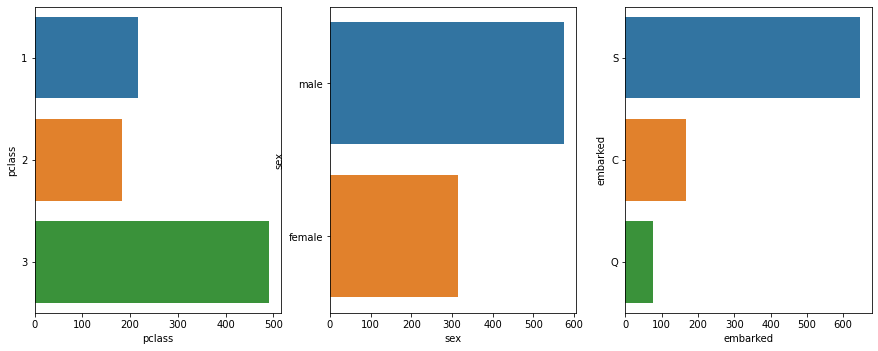

In [ ]:
#graphical representation of the categorical variables
columns=['pclass','sex','embarked']
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for col in columns:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(y=col,data=titanic)
  plt.xlabel(col)
  plt.ylabel(col)
  plotnumber+=1
plt.show()

Most of the passengers were in the 3rd class.

Majority of the passengers were males.

Majority of the passengers boarded from Southampton.

## Bivariate Analysis

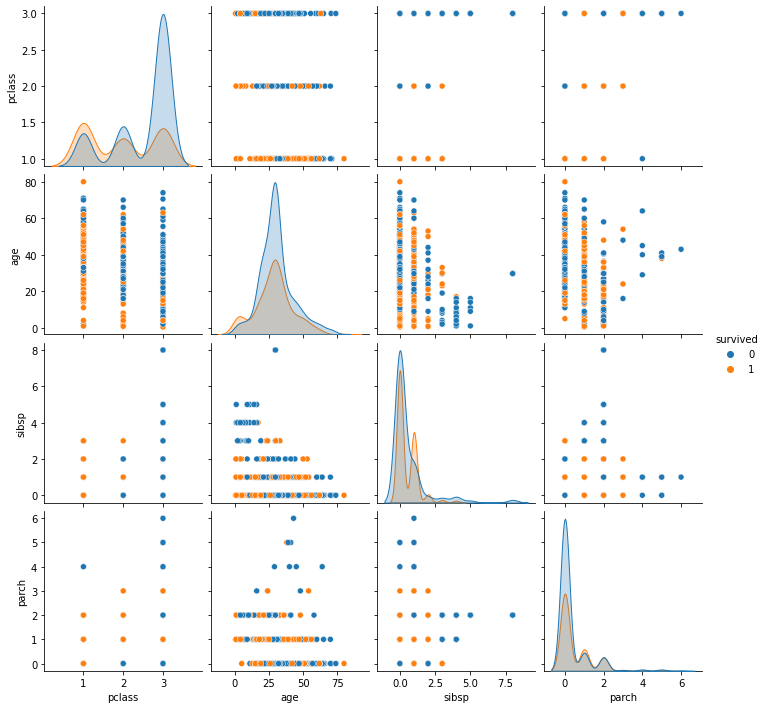

In [ ]:
#plotting Bivariate summaries
sns.pairplot(titanic,hue='survived')
plt.show()

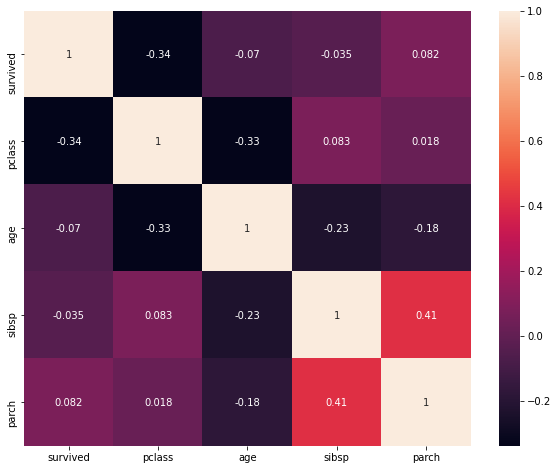

In [ ]:
# Lets understand the correlations of each parament using heatmaps
corr=titanic.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

There is a weak correlation between the variables.There is no value greatr than 0.5 for the positive correlation and there is no value greater than -0.5 for the weak correlation.

Number of siblings or spouses(sibsp) and number of parents or children(parch) have a weak positive correlation of 0.41

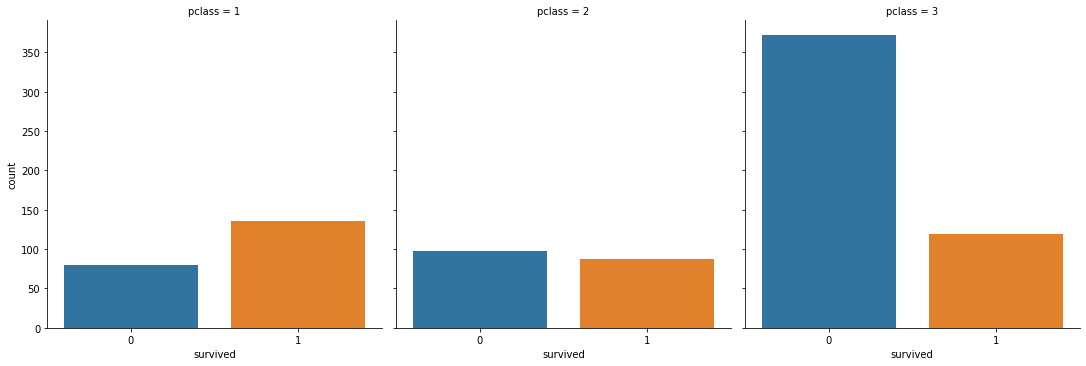

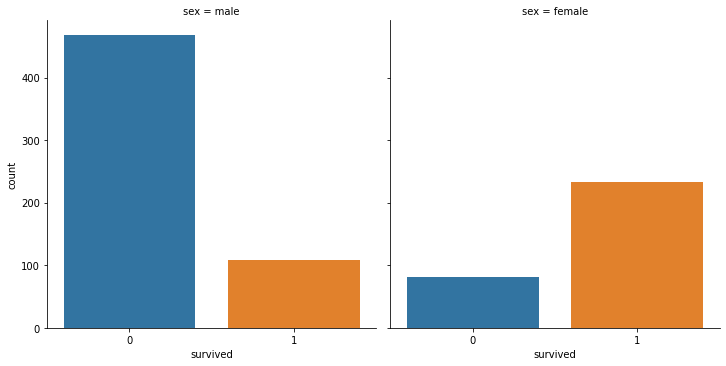

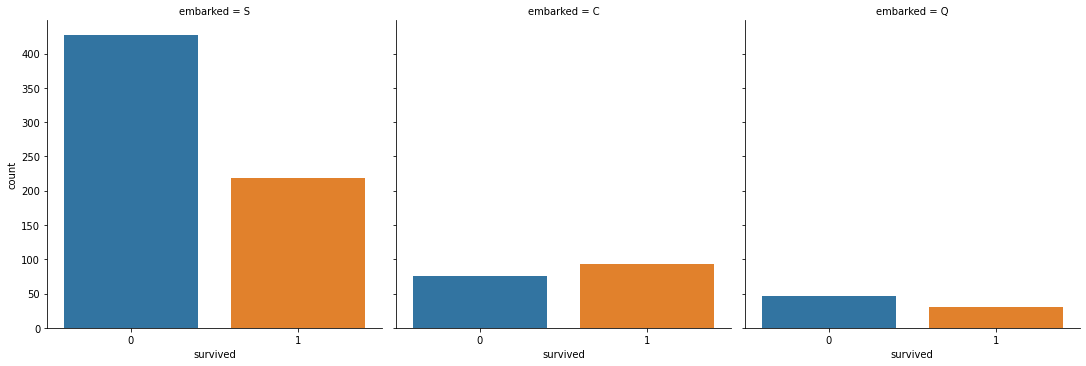

In [ ]:
#bivariate ananlysis of categorical data
columns=['pclass','sex','embarked']
for col in columns:
  sns.catplot(x='survived',col=col,kind='count',data=titanic)
plt.show()

**Passenger clas vs Survival**

In the first class majorit of the passengers Survived.

In the second class majority of the passengers did not survive.

in the third class majority of the passngers did not survive.

**Gender vs Survival**

Majority of the male passengers did not survive.

Majority of the female passengers survivied.

**Port of Embarkation vs Survival**

Majority of the passengers who embarked the Ship at Southampton did not survive.

Majority of the passengers who embarked the ship at Cherbourg survived.

Majority of the passengers who embarked the shio at Queentown did not survive.



#Modelling


In [ ]:
#converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder
columns=['sex','embarked']
for col in columns:
  labelencoder = LabelEncoder()
  
  labelencoder.fit(titanic[col])
  titanic[col] = labelencoder.transform(titanic[col])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


##80:20

In [ ]:
#Declaring our X and y variables
X = titanic.drop('survived', axis=1)
y = titanic.survived

#Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score =: 0.7877094972067039 
[[96 14]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



Splitting the data into **80:20** yields to an accuracy score of **79%**.

**True Positive :**96

**True Negative :**45

**False Positive :** 14

**False Negative:**24

In [ ]:
#Applying the GridSeachCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


K=9

p=1 Equivalent to using manhattan distance. 

In [ ]:
#applying the tuned parameters
#Training 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9,p=1)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.8100558659217877 
[[97 13]
 [21 48]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



After applying the tuned prameters the **accuracy score increases to 81%.**

**True Positive :**97

**True Negative :**48

**False Positive :** 13

**False Negative:**21

##70:30

In [ ]:
#Train Test Split (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score =: 0.7649253731343284 
[[138  30]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.69      0.67      0.68       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



Spliting the data into 70:30 results to a low **accuracy score of 76%** compared to that of the 80:20.

**True Positive :**138

**True Negative :**67

**False Positive:**30

**False Negative:**33

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


In [ ]:
#applying the tuned parameters
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9,p=1)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7947761194029851 
[[146  22]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       168
           1       0.75      0.67      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



Applying the tuned parameters into ou model leads to an **increase in accuracy score to 79%**.But th score is still low than that of the 80-20.

**True Positive :**146

**True Negative :**67

**False Positive :**22

**False Negative:**33

##60:40

In [ ]:
#Train Test Split (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score =: 0.7703081232492998 
[[185  36]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       221
           1       0.71      0.66      0.69       136

    accuracy                           0.77       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.77      0.77      0.77       357



Splitting the data into 60:40 yields an **accuracy score of 77%** which is the least compard to the 80:20 and 70:30.

**True Positive :**185

**True Negative :**90

**False Positive :**36

**False Negative:**46

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


In [ ]:
#applying the tuned parameters
#Training 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9,p=1)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.8207282913165266 
[[201  20]
 [ 44  92]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       221
           1       0.82      0.68      0.74       136

    accuracy                           0.82       357
   macro avg       0.82      0.79      0.80       357
weighted avg       0.82      0.82      0.82       357



Applying the tuned parameters leads to the **highest accuracy score of 82%.**

**True Positive :**201

**True Negative :**92

**False Positive :**20

**False Negative:**44

##Challenging the solution

1. Did we have the right data?Yes.The data provided was right.
2. Did we use the correct models?Yes.The model had a high accuracy score.

##Conclusion

**Model Accuracy**

**Before Tuning the parameters**

**80:20 -**79%

**70:30 -**76%

**60:40 -**77%

**After Tuning the parameters**

**80:20 -**81%

**70:30 -**79%

**60:40 -**82%


We recommended that we should use the 60:40 model with the tuned parameters to predict if the passenger survived or not since it yielded a high accuracy score of 82%. 